## EDA of the ABO Dataset

Use the 3.12 environment locally

In [182]:
from mediapipe.tasks import python
from mediapipe.tasks.python import text

import tarfile
import gzip
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Read the JSON data right out of the tar file.

In [8]:
def read_json_from_tar(tar_file):
    # Open the tar file
    dflist = []
    with tarfile.open(tar_file, 'r') as tar:
        for member in tqdm(tar.getmembers()):
            if member.name.endswith('json.gz'):
                #print(f"Reading {member.name}...")
                # Extract the gz file in memory
                f = tar.extractfile(member)
                if f is not None:
                  with gzip.open(f, 'rt') as f:
                    df = pd.read_json(f, lines=True)
                    dflist.append(df)
    pdf = pd.concat(dflist).set_index('item_id')
    return pdf

pdf = read_json_from_tar("../../ABO_dataset/abo-listings.tar")

100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


In [5]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147702 entries, B07NQ437BB to B07DFWQV5V
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   brand                147643 non-null  object
 1   bullet_point         131570 non-null  object
 2   color                116180 non-null  object
 3   fabric_type          8193 non-null    object
 4   item_name            147702 non-null  object
 5   item_weight          106194 non-null  object
 6   model_name           81579 non-null   object
 7   model_number         124091 non-null  object
 8   product_type         147702 non-null  object
 9   style                43188 non-null   object
 10  main_image_id        147127 non-null  object
 11  other_image_id       137976 non-null  object
 12  color_code           18243 non-null   object
 13  country              147702 non-null  object
 14  marketplace          147702 non-null  object
 15  domain_name          14770

### Data Filtering

Drop some of the columns we won't be using.

In [8]:
pdf = pdf.drop(columns=['model_number',
                        'color_code',
                        'node',
                        'item_dimensions',
                        'spin_id',
                        '3dmodel_id',
                        'item_shape'])
# pdf = pdf[pdf['country'] == 'US']
# pdf = pdf[pdf['domain_name'] == 'amazon.com']
pdf

,brand,bullet_point,color,fabric_type,item_name,item_weight,model_name,product_type,style,main_image_id,other_image_id,country,marketplace,domain_name,material,item_keywords,pattern,model_year,product_description,finish_type
item_id,,,,,,,,,,,,,,,,,,,,
B07NQ437BB,"[{'language_tag': 'fr_FR', 'value': 'Amazon Es...","[{'language_tag': 'fr_FR', 'value': 'Plat clas...","[{'language_tag': 'fr_FR', 'standardized_value...","[{'language_tag': 'fr_FR', 'value': '100% Synt...","[{'language_tag': 'fr_FR', 'value': 'Amazon Es...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'fr_FR', 'value': 'Manny'}]",[{'value': 'SHOES'}],"[{'language_tag': 'fr_FR', 'value': 'Manny'}]",61fH9aTfMIL,"[71AymDrpuFL, 61qXoMZjStL, 61qDo19NgzL, 61h3Bq...",FR,Amazon,amazon.fr,NaN,NaN,NaN,NaN,NaN,NaN
B0857LSVB7,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Samsung G...",[{'value': 'CELLULAR_PHONE_CASE'}],NaN,81-DuD5XzmL,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,"[{'language_tag': 'en_IN', 'value': 'Silicon'}]","[{'language_tag': 'en_IN', 'value': 'Back Cove...",NaN,NaN,NaN,NaN
B07C5FF8QS,"[{'language_tag': 'en_SG', 'value': 'AmazonBas...","[{'language_tag': 'en_SG', 'value': 'For best ...",NaN,NaN,"[{'language_tag': 'en_SG', 'value': 'AmazonBas...",NaN,NaN,[{'value': 'AUTO_OIL'}],"[{'language_tag': 'en_SG', 'value': 'High Mile...",81YCp3dcurL,"[817GQ6xx-QL, 81Vr9poKgCL]",SG,Amazon,amazon.sg,NaN,"[{'language_tag': 'en_SG', 'value': 'oil'}, {'...","[{'language_tag': 'en_SG', 'value': '10W-30'}]",NaN,NaN,NaN
B07K591232,"[{'language_tag': 'it_IT', 'value': 'AmazonBas...",NaN,NaN,NaN,"[{'language_tag': 'it_IT', 'value': 'AmazonBas...",NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],NaN,71EwvyC4A1L,"[71FbjGLOOIL, 61Ot9qEVqOL, 91WAK5rtolL]",IT,Amazon,amazon.it,NaN,NaN,NaN,NaN,NaN,NaN
B07TG425LX,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': '3D Printe...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Huawei P9...",[{'value': 'CELLULAR_PHONE_CASE'}],NaN,71ZoXfUr-sL,"[81IiaAkE6UL, 61Xce1Hq7DL, 61ATVyzpLKL, 61oI69...",IN,Amazon,amazon.in,NaN,"[{'language_tag': 'en_IN', 'value': 'mobile co...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B07P56ZF4T,"[{'language_tag': 'en_US', 'value': 'find.'}]","[{'language_tag': 'en_US', 'value': 'An Amazon...","[{'language_tag': 'en_US', 'standardized_value...",NaN,"[{'language_tag': 'en_US', 'value': 'Amazon Br...",NaN,"[{'language_tag': 'en_US', 'value': 'Wedge Sol...",[{'value': 'SANDAL'}],"[{'language_tag': 'en_US', 'value': 'Wedge Sol...",81bm7s7poAL,"[81bc6R+27CL, 81gZQAUnZPL, 71Snc-Id2zL, 81OWRg...",US,Amazon,amazon.com,NaN,NaN,NaN,NaN,NaN,NaN
B0854LJBYD,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'iKall K20...",[{'value': 'CELLULAR_PHONE_CASE'}],NaN,71gMBWGQZ0L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,"[{'language_tag': 'en_IN', 'value': 'Silicon'}]","[{'language_tag': 'en_IN', 'value': 'Back Cove...",NaN,NaN,NaN,NaN
B081HNTNK7,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Vivo V17 ...",[{'value': 

We only want to keep the rows that have an English tag.

In [10]:
def has_english_tag(row):
    for value in row:
        if isinstance(value, list) and all(isinstance(item, dict) for item in value):
            for item in value:
                if 'language_tag' in item and item['language_tag'].startswith('en_'):
                    return True
    return False

pdf = pdf[[has_english_tag(pdf.loc[item_id]) for item_id in tqdm(pdf.index)]]

100%|██████████| 147702/147702 [34:29<00:00, 71.35it/s] 


In [11]:
pdf

,brand,bullet_point,color,fabric_type,item_name,item_weight,model_name,product_type,style,main_image_id,other_image_id,country,marketplace,domain_name,material,item_keywords,pattern,model_year,product_description,finish_type
item_id,,,,,,,,,,,,,,,,,,,,
B0857LSVB7,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Samsung G...",[{'value': 'CELLULAR_PHONE_CASE'}],NaN,81-DuD5XzmL,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,"[{'language_tag': 'en_IN', 'value': 'Silicon'}]","[{'language_tag': 'en_IN', 'value': 'Back Cove...",NaN,NaN,NaN,NaN
B07C5FF8QS,"[{'language_tag': 'en_SG', 'value': 'AmazonBas...","[{'language_tag': 'en_SG', 'value': 'For best ...",NaN,NaN,"[{'language_tag': 'en_SG', 'value': 'AmazonBas...",NaN,NaN,[{'value': 'AUTO_OIL'}],"[{'language_tag': 'en_SG', 'value': 'High Mile...",81YCp3dcurL,"[817GQ6xx-QL, 81Vr9poKgCL]",SG,Amazon,amazon.sg,NaN,"[{'language_tag': 'en_SG', 'value': 'oil'}, {'...","[{'language_tag': 'en_SG', 'value': '10W-30'}]",NaN,NaN,NaN
B07TG425LX,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': '3D Printe...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Huawei P9...",[{'value': 'CELLULAR_PHONE_CASE'}],NaN,71ZoXfUr-sL,"[81IiaAkE6UL, 61Xce1Hq7DL, 61ATVyzpLKL, 61oI69...",IN,Amazon,amazon.in,NaN,"[{'language_tag': 'en_IN', 'value': 'mobile co...",NaN,NaN,NaN,NaN
B07LCHFZCW,"[{'language_tag': 'en_US', 'value': 'Amazon Go'}]",NaN,NaN,NaN,"[{'language_tag': 'en_US', 'value': 'Amazon Ki...",NaN,NaN,[{'value': 'GROCERY'}],NaN,61bCuBtuZ4L,"[61njweKAz7L, 61UEtH+yC3L]",US,Amazon,amazon.com,NaN,NaN,NaN,NaN,NaN,NaN
B077W2YX72,"[{'language_tag': 'en_US', 'value': 'Wickedly ...","[{'language_tag': 'en_US', 'value': 'One 44-ou...",NaN,NaN,"[{'language_tag': 'en_US', 'value': 'Wickedly ...","[{'normalized_value': {'unit': 'pounds', 'valu...",NaN,[{'value': 'GROCERY'}],NaN,71QbaO8qZIL,"[51M39MBAwDL, 71F6YzH37XL, 71d7-4rSVlL, 61ucPj...",US,AmazonGo,amazon.com/go,NaN,"[{'language_tag': 'en_US', 'value': 'pretzels'...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08569DDNF,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Samsung G...",[{'value': 'CELLULAR_PHONE_CASE'}],NaN,71aKx9Gm56L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,"[{'language_tag': 'en_IN', 'value': 'Silicon'}]","[{'language_tag': 'en_IN', 'value': 'Back Cove...",NaN,NaN,NaN,NaN
B0854LJBYD,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'iKall K20...",[{'value': 'CELLULAR_PHONE_CASE'}],NaN,71gMBWGQZ0L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,"[{'language_tag': 'en_IN', 'value': 'Silicon'}]","[{'language_tag': 'en_IN', 'value': 'Back Cove...",NaN,NaN,NaN,NaN
B081HNTNK7,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Vivo V17 ...",[{'value': 'CELLULAR_PHONE_CASE'}],NaN,711dUWWY+AL,"[51AbYbblgmL, 51PN64bq

For the remaining rows, whenever there are language tags, we only keep the English ones.

In [12]:
# Previously only took the first English item from a list. Problem if there were multiple, as in bullet points. Fixed.

def extract_value(value):
    if isinstance(value, list) and all(isinstance(item, dict) for item in value):
        english_items = []
        for item in value:
            if 'language_tag' in item and item['language_tag'].startswith('en_') \
              or 'language_tag' not in item and 'value' in item:
                english_items.append(item['value'])
        if len(english_items) == 1:
            return english_items[0]
        return english_items
    return value

for col in tqdm(pdf.columns):
    for i in range(len(pdf[col])):
        pdf[col][i] = extract_value(pdf[col][i])

100%|██████████| 20/20 [08:36<00:00, 25.81s/it]


That processing took a while, so save the result.

In [179]:
# pdf.to_pickle("../../ABO_dataset/abo-listings-english-tags.pkl")
pdf = pd.read_pickle("../../../ShopTalk-blobs/ABO_dataset/abo-listings-english-tags.pkl")
pdf

,brand,bullet_point,color,fabric_type,item_name,item_weight,model_name,product_type,style,main_image_id,other_image_id,country,marketplace,domain_name,material,item_keywords,pattern,model_year,product_description,finish_type
item_id,,,,,,,,,,,,,,,,,,,,
B0857LSVB7,Amazon Brand - Solimo,"[Snug fit for Samsung Galaxy J2 Ace, with perf...",Multicolor,NaN,Amazon Brand - Solimo Designer Lion UV Printed...,50,Samsung Galaxy J2 Ace,CELLULAR_PHONE_CASE,NaN,81-DuD5XzmL,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Lion Mobi...",NaN,NaN,NaN,NaN
B07C5FF8QS,AmazonBasics,"For best performance, follow the manufacturer'...",NaN,NaN,"AmazonBasics High Mileage Motor Oil, Synthetic...",NaN,NaN,AUTO_OIL,High Mileage - Synthetic Blend,81YCp3dcurL,"[817GQ6xx-QL, 81Vr9poKgCL]",SG,Amazon,amazon.sg,NaN,"[oil, mobil 1, penzoil, castrol gtx, 5W-20, 5W...",10W-30,NaN,NaN,NaN
B07TG425LX,Amazon Brand - Solimo,[3D Printed Hard Back Case Mobile Cover for Hu...,Others,NaN,Amazon Brand - Solimo Designer Semi Circle Tex...,50,Huawei P9 lite,CELLULAR_PHONE_CASE,NaN,71ZoXfUr-sL,"[81IiaAkE6UL, 61Xce1Hq7DL, 61ATVyzpLKL, 61oI69...",IN,Amazon,amazon.in,NaN,"[mobile cover, back cover, mobile case, phone ...",NaN,NaN,NaN,NaN
B07LCHFZCW,Amazon Go,NaN,NaN,NaN,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",NaN,NaN,GROCERY,NaN,61bCuBtuZ4L,"[61njweKAz7L, 61UEtH+yC3L]",US,Amazon,amazon.com,NaN,NaN,NaN,NaN,NaN,NaN
B077W2YX72,Wickedly Prime,"[One 44-ounce plastic tub, Contains wheat, pea...",NaN,NaN,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",2.8,NaN,GROCERY,NaN,71QbaO8qZIL,"[51M39MBAwDL, 71F6YzH37XL, 71d7-4rSVlL, 61ucPj...",US,AmazonGo,amazon.com/go,NaN,"[pretzels, peanut butter, peanut butter pretze...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08569DDNF,Amazon Brand - Solimo,"[Snug fit for Samsung Galaxy A2 Core, with per...",Multicolor,NaN,Amazon Brand - Solimo Designer Chinnese Yin an...,50,Samsung Galaxy A2 Core,CELLULAR_PHONE_CASE,NaN,71aKx9Gm56L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Chinnese ...",NaN,NaN,NaN,NaN
B0854LJBYD,Amazon Brand - Solimo,"[Snug fit for iKall K200, with perfect cut-out...",Multicolor,NaN,Amazon Brand - Solimo Designer Teddy Bear UV P...,50,iKall K200,CELLULAR_PHONE_CASE,NaN,71gMBWGQZ0L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Teddy Bea...",NaN,NaN,NaN,NaN
B081HNTNK7,Amazon Brand - Solimo,"[Snug fit for Mobile, with perfect cut-outs fo...",multi-colored,NaN,Amazon Brand - Solimo Designer Alphabet Patter...,50,Vivo V17 Pro,CELLULAR_PHONE_CASE,NaN,711dUWWY+AL,"[51AbYbblgmL, 51PN64bqb9L, 51kP9HdPKhL]",IN,Amazon,amazon.in,Plastic,"[mobile cover, back cover, mobile case, phone ...",NaN,NaN,NaN,NaN


#### Save a sample for testing in other notebooks

We want a somewhat representative sample, so we group by product type, then save 10 or the number of products in the group, whichever is less.

In [180]:
pdf['product_type'].value_counts()

product_type
CELLULAR_PHONE_CASE          64749
SHOES                         9079
GROCERY                       6109
HOME                          2545
CHAIR                         1714
                             ...  
STROLLER                         1
SLOW_COOKER                      1
GUITARS                          1
SCULPTURE                        1
SKIN_FOUNDATION_CONCEALER        1
Name: count, Length: 529, dtype: int64

Text(0.5, 1.0, 'Frequency of product type counts')

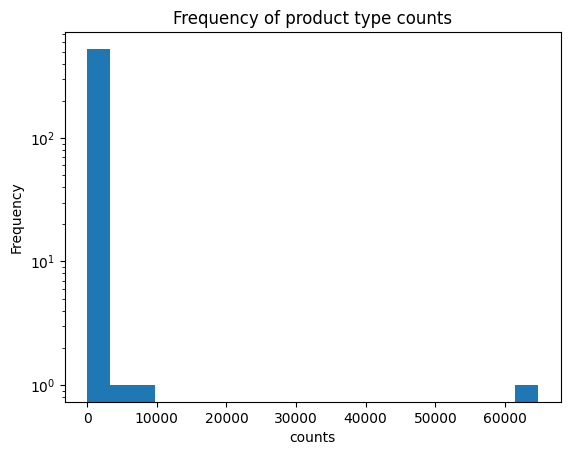

In [ ]:
pdf['product_type'].value_counts().plot.hist(bins=20)
plt.yscale('log')
plt.xlabel('counts')
plt.title('Frequency of product type counts')


In [17]:
def sample_groups(group, rng):
    n = min(len(group), 10)
    return group.sample(n=n, random_state=rng)
    
rng = np.random.default_rng(seed=42)
pdf_sample = pdf.groupby('product_type').apply(lambda group: sample_groups(group, rng)).reset_index(level='product_type', drop=True)
pdf_sample

,brand,bullet_point,color,fabric_type,item_name,item_weight,model_name,product_type,style,main_image_id,other_image_id,country,marketplace,domain_name,material,item_keywords,pattern,model_year,product_description,finish_type
item_id,,,,,,,,,,,,,,,,,,,,
B083VHXTQ1,[],"[With this firming eye mask, your skin will lo...",NaN,NaN,Amazon Brand:Belei Moisturizing Lifting Eye Ma...,NaN,NaN,ABIS_BEAUTY,[],51ZvgucquXL,"[51PSBY8h8LL, 61ZcL8JqMVL, 61ZomqVpklL, 61ykRD...",DE,Amazon,amazon.de,NaN,[],NaN,NaN,NaN,NaN
B083VJ7P68,BELEI,[Rediscover youthful looking skin with this fi...,NaN,NaN,Amazon Brand - Belei - Lifting Sheet Mask with...,NaN,NaN,ABIS_BEAUTY,Lifting,51G7HvO94pL,"[41qhq+Q55zL, 616anjMkgcL, 51cxHmZQZuL, 61NCNb...",GB,Amazon,amazon.co.uk,NaN,"[peel off face masks, serum, other, multimask,...",NaN,NaN,NaN,NaN
B083VJ54TY,BELEI,[Rediscover youthful looking skin with this fi...,NaN,NaN,Amazon Brand - Belei - Full face treatment she...,NaN,NaN,ABIS_BEAUTY,Full face treatment,51eC8v7TQVL,"[51195iJBIiL, 71UsrlwqWXL, 516GHxy3KEL, 61zImT...",GB,Amazon,amazon.co.uk,NaN,"[peel off face masks, serum, other, multimask,...",NaN,NaN,NaN,NaN
B083VJ435H,Belei,[Rediscover youthful looking skin with this fi...,NaN,NaN,Amazon Brand - Belei - Brightening Sheet Mask ...,NaN,NaN,ABIS_BEAUTY,Brightening,51LoGumNTWL,"[61V1PqjdRQL, 61AbctEZQJL, 41-V96Oy40L, 611MS9...",AU,Amazon,amazon.com.au,NaN,face wash women laneige water sleeping mask ma...,NaN,NaN,NaN,NaN
B07SDFXTS8,find.,"[Pack contains: 4 bottles x 150ml, Gently and ...",NaN,NaN,FIND - Gentle Eye Make-Up Remover Oil Free (4 ...,0.82,NaN,ABIS_BEAUTY,Non-Waterproof Make Up,617AfCdQOSL,"[614O9YXh3OL, 513RvEZH2IL, 61WjBQ+zCdL, 61VZmD...",GB,Amazon,amazon.co.uk,NaN,[kaeso eye make up remover makeup clarins clin...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B07PQQHW9V,Amazon Brand - Solimo,"[A set of 20 White Board Markers in black(7), ...",multicoloured,NaN,Amazon Brand - Solimo White Board Markers Set ...,299,NaN,WRITING_INSTRUMENT,NaN,81C+fwlZC4L,"[812KYgE73DL, 21-RCMhs5TL, 71v-G80nECL]",IN,Amazon,amazon.in,plastic,"[whiteboard markers, office markers, erasable ...",NaN,NaN,NaN,NaN
B0756H8HMV,AmazonBasics,[12-pack of gel ink pens pre-filled with black...,Black,NaN,AmazonBasics Retractable Gel Ink Pens - Fine P...,0.022443,NaN,WRITING_INSTRUMENT,Fine Point,61gZ4qoUGDL,"[61axV27hGjL, 81C9TttvC2L, 2113uM7xhBL, 41s1cA...",GB,Amazon,amazon.co.uk,Rubber,sakura gelly roll uniball gel impact 1.0 black...,NaN,NaN,NaN,NaN
B07PNFZ9DB,Amazon Brand - Solimo,"[A set of 20 Permanent Markers in black(5), bl...",multicoloured,NaN,Amazon Brand - Solimo Permanent Marker Set (20...,299,NaN,WRITING_INSTRUMENT,NaN,81NlkVGhRzL,"[710fbJVWu8L, 91OTeaNxaSL, 21btX+LZTrL]",IN,Amazon,amazon.in,plastic,"[whiteboard markers, office markers, erasable ...",NaN,NaN,NaN,NaN


In [ ]:
# pdf_sample.to_pickle("../../ABO_dataset/abo-listings-sample.pkl")
pdf_sample = pd.read_pickle("../../ABO_dataset/abo-listings-sample.pkl")
pdf_sample

,brand,bullet_point,color,fabric_type,item_name,item_weight,model_name,product_type,style,main_image_id,other_image_id,country,marketplace,domain_name,material,item_keywords,pattern,model_year,product_description,finish_type
item_id,,,,,,,,,,,,,,,,,,,,
B083VHXTQ1,[],"[With this firming eye mask, your skin will lo...",NaN,NaN,Amazon Brand:Belei Moisturizing Lifting Eye Ma...,NaN,NaN,ABIS_BEAUTY,[],51ZvgucquXL,"[51PSBY8h8LL, 61ZcL8JqMVL, 61ZomqVpklL, 61ykRD...",DE,Amazon,amazon.de,NaN,[],NaN,NaN,NaN,NaN
B083VJ7P68,BELEI,[Rediscover youthful looking skin with this fi...,NaN,NaN,Amazon Brand - Belei - Lifting Sheet Mask with...,NaN,NaN,ABIS_BEAUTY,Lifting,51G7HvO94pL,"[41qhq+Q55zL, 616anjMkgcL, 51cxHmZQZuL, 61NCNb...",GB,Amazon,amazon.co.uk,NaN,"[peel off face masks, serum, other, multimask,...",NaN,NaN,NaN,NaN
B083VJ54TY,BELEI,[Rediscover youthful looking skin with this fi...,NaN,NaN,Amazon Brand - Belei - Full face treatment she...,NaN,NaN,ABIS_BEAUTY,Full face treatment,51eC8v7TQVL,"[51195iJBIiL, 71UsrlwqWXL, 516GHxy3KEL, 61zImT...",GB,Amazon,amazon.co.uk,NaN,"[peel off face masks, serum, other, multimask,...",NaN,NaN,NaN,NaN
B083VJ435H,Belei,[Rediscover youthful looking skin with this fi...,NaN,NaN,Amazon Brand - Belei - Brightening Sheet Mask ...,NaN,NaN,ABIS_BEAUTY,Brightening,51LoGumNTWL,"[61V1PqjdRQL, 61AbctEZQJL, 41-V96Oy40L, 611MS9...",AU,Amazon,amazon.com.au,NaN,face wash women laneige water sleeping mask ma...,NaN,NaN,NaN,NaN
B07SDFXTS8,find.,"[Pack contains: 4 bottles x 150ml, Gently and ...",NaN,NaN,FIND - Gentle Eye Make-Up Remover Oil Free (4 ...,0.82,NaN,ABIS_BEAUTY,Non-Waterproof Make Up,617AfCdQOSL,"[614O9YXh3OL, 513RvEZH2IL, 61WjBQ+zCdL, 61VZmD...",GB,Amazon,amazon.co.uk,NaN,[kaeso eye make up remover makeup clarins clin...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B07PQQHW9V,Amazon Brand - Solimo,"[A set of 20 White Board Markers in black(7), ...",multicoloured,NaN,Amazon Brand - Solimo White Board Markers Set ...,299,NaN,WRITING_INSTRUMENT,NaN,81C+fwlZC4L,"[812KYgE73DL, 21-RCMhs5TL, 71v-G80nECL]",IN,Amazon,amazon.in,plastic,"[whiteboard markers, office markers, erasable ...",NaN,NaN,NaN,NaN
B0756H8HMV,AmazonBasics,[12-pack of gel ink pens pre-filled with black...,Black,NaN,AmazonBasics Retractable Gel Ink Pens - Fine P...,0.022443,NaN,WRITING_INSTRUMENT,Fine Point,61gZ4qoUGDL,"[61axV27hGjL, 81C9TttvC2L, 2113uM7xhBL, 41s1cA...",GB,Amazon,amazon.co.uk,Rubber,sakura gelly roll uniball gel impact 1.0 black...,NaN,NaN,NaN,NaN
B07PNFZ9DB,Amazon Brand - Solimo,"[A set of 20 Permanent Markers in black(5), bl...",multicoloured,NaN,Amazon Brand - Solimo Permanent Marker Set (20...,299,NaN,WRITING_INSTRUMENT,NaN,81NlkVGhRzL,"[710fbJVWu8L, 91OTeaNxaSL, 21btX+LZTrL]",IN,Amazon,amazon.in,plastic,"[whiteboard markers, office markers, erasable ...",NaN,NaN,NaN,NaN


#### Language Checking

We use Google's MediaPipe language detection for Edge AI, then check non-English detections against Google Cloud language detection.

See the language detection notebook for an analysis of three different language detection models.

First, convert the relevant data from the rows to strings.

In [3]:
def row_to_text(row):
    row_filtered = row.drop(labels=['brand', 'item_weight', 'model_name', 'product_type', 'main_image_id', 'other_image_id', 'country', 'marketplace', 'domain_name', 'model_year']).dropna()
    text = []
    for item in row_filtered:
        if isinstance(item, list):
            text.extend(item)
        else:
            text.append(item)
    
    return ' '.join(text).replace('\n', ' ')

text_for_detection = [row_to_text(pdf.loc[item_id]) for item_id in tqdm(pdf.index)]

  0%|          | 0/120382 [00:00<?, ?it/s]

100%|██████████| 120382/120382 [00:30<00:00, 3976.54it/s]


Load then run the MediaPipe language detection

In [5]:
base_options = python.BaseOptions(model_asset_path="../../assets/language_detector.tflite")
options = text.LanguageDetectorOptions(base_options=base_options)
mediapipe_detector = text.LanguageDetector.create_from_options(options)

In [7]:
mediapipe_detection_results = {'languages': [], 'confidences': []}

for item in tqdm(text_for_detection):
    mediapipe_result = mediapipe_detector.detect(item).detections
    if mediapipe_result:
        mediapipe_detection_results['languages'].append(mediapipe_result[0].language_code)
        mediapipe_detection_results['confidences'].append(mediapipe_result[0].probability)
    else:
        mediapipe_detection_results['languages'].append(None)
        mediapipe_detection_results['confidences'].append(None)
        
mediapipe_detection_results_df = pd.DataFrame(mediapipe_detection_results)

100%|██████████| 120382/120382 [00:19<00:00, 6095.17it/s]


Put any non-English detections (including null results) through Google Cloud language detection.

In [8]:
indexes_for_cloud_detection = mediapipe_detection_results_df[mediapipe_detection_results_df['languages'] != 'en'].index
len(indexes_for_cloud_detection)

855

In [9]:
def detect_language_google_cloud(text: list) -> dict:
    """Detects the text's language."""
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.detect_language(text)

    return result

In [10]:
cloud_detection_results = {'index': [], 'languages': [], 'confidences': []}

for idx in tqdm(indexes_for_cloud_detection):
    text_item = text_for_detection[idx]
    google_cloud_detection = detect_language_google_cloud(text_item)
    cloud_detection_results['index'].append(idx)
    cloud_detection_results['languages'].append(google_cloud_detection['language'])
    cloud_detection_results['confidences'].append(google_cloud_detection['confidence'])
    
cloud_detection_results_df = pd.DataFrame(cloud_detection_results).set_index('index')

100%|██████████| 855/855 [14:34<00:00,  1.02s/it]


We don't want to have to do that again, so save the cloud language detections.

In [ ]:
# cloud_detection_results_df.to_pickle("../../../Capstone Project - ShopTalk/ABO_dataset/abo-listings-cloud-language-detections.pkl")
cloud_detection_results_df = pd.read_pickle("../../../Capstone Project - ShopTalk/ABO_dataset/abo-listings-cloud-language-detections.pkl")
cloud_detection_results_df

,languages,confidences
index,,
3,en,0.751012
172,en,0.622272
360,rw,0.397104
447,ja-Latn,0.544864
449,en,0.879083
...,...,...
119759,en,0.411307
119772,en,0.561561
120093,da,1.000000


In [12]:
cloud_detection_results_df[cloud_detection_results_df['languages']!='en']

,languages,confidences
index,,
360,rw,0.397104
447,ja-Latn,0.544864
646,fi,0.303385
889,war,0.414933
1050,ja-Latn,0.321378
...,...,...
118110,om,0.349250
118155,kha,0.344741
118822,ja,1.000000


All that's left is to check if the rest really can't pass as English.

In [15]:
non_eng_idxs = cloud_detection_results_df[cloud_detection_results_df['languages']!='en'].index
for idx in non_eng_idxs:
    print(f'{idx}: {text_for_detection[idx]}')

360: [Find] Amazon Collection roziumumekkisuta-ringusiruba-kuriaringu 3.5 mm kyu-bikkuzirukoniaba-pendantotye-n with Pendant jep00456 _ 110cl00jd00 
447: [Find] Amazon Collection roziumumekkisuta-ringusiruba-kuriaha-to Notebook kyu-bikkuzirukoniaharo-ringu, Size 11 
646: Cubic zirconia (CZ) [Find] Amazon Collection roziumumekkisuta-ringusiruba-kuriaasuka- & Round kattokyu-bikkuzirukoniainsa-toringusetto, Size 9 
889: Brown Napa Tan Napa Tan find. Acton Derbys, Brown Napa Tan), 6 UK Acton UK
1050: [Find] Amazon Collection 18 K Yellow Gold Silver daiyamondoraundokurasuta-buraidaruringu, Size 7 
1292: Store in a cool dry place Amazon Brand - Vedaka Popular Green Moong Split, 500g moong dal green gram lentil moong daal pulses chana dal dal green moong dal dal makhni moong dal green gram lentil moong daal pulses chana dal dal green moong dal dal makhni moong dal green gram lentil moong daal pulses chana dal dal green moong dal dal makhni moong dal green gram lentil moong daal pulses chana d

There are 310 items that not even Google Cloud language detection could detect as English. Some are obviously just using special words (e.g. Shrimp Jumbalaya). However, we must decide what to do with them. I'm going to keep some specific ones while dropping the rest.

In [13]:
idxs_to_not_drop = [5205, 7344, 9407, 16885, 18658, 22066, 25430, 26683, 28422, 35301, 43730, 46497, 54544, 64989, 67539, 74752, 86711, 87170,
                    88574, 88918, 90516, 91059, 95888, 99579, 99919, 103418, 108689, 115425, 119193, 120093]

In [25]:
idxs_to_drop = list(set(non_eng_idxs) - set(idxs_to_not_drop))
pdf = pdf.drop(pdf.index[idxs_to_drop])

In [ ]:
# pdf.to_pickle("../../../Capstone Project - ShopTalk/ABO_dataset/abo-listings-verified-english.pkl")
pdf = pd.read_pickle("../../../Capstone Project - ShopTalk/ABO_dataset/abo-listings-verified-english.pkl")
pdf

,brand,bullet_point,color,fabric_type,item_name,item_weight,model_name,product_type,style,main_image_id,other_image_id,country,marketplace,domain_name,material,item_keywords,pattern,model_year,product_description,finish_type
item_id,,,,,,,,,,,,,,,,,,,,
B0857LSVB7,Amazon Brand - Solimo,"[Snug fit for Samsung Galaxy J2 Ace, with perf...",Multicolor,NaN,Amazon Brand - Solimo Designer Lion UV Printed...,50,Samsung Galaxy J2 Ace,CELLULAR_PHONE_CASE,NaN,81-DuD5XzmL,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Lion Mobi...",NaN,NaN,NaN,NaN
B07C5FF8QS,AmazonBasics,"For best performance, follow the manufacturer'...",NaN,NaN,"AmazonBasics High Mileage Motor Oil, Synthetic...",NaN,NaN,AUTO_OIL,High Mileage - Synthetic Blend,81YCp3dcurL,"[817GQ6xx-QL, 81Vr9poKgCL]",SG,Amazon,amazon.sg,NaN,"[oil, mobil 1, penzoil, castrol gtx, 5W-20, 5W...",10W-30,NaN,NaN,NaN
B07TG425LX,Amazon Brand - Solimo,[3D Printed Hard Back Case Mobile Cover for Hu...,Others,NaN,Amazon Brand - Solimo Designer Semi Circle Tex...,50,Huawei P9 lite,CELLULAR_PHONE_CASE,NaN,71ZoXfUr-sL,"[81IiaAkE6UL, 61Xce1Hq7DL, 61ATVyzpLKL, 61oI69...",IN,Amazon,amazon.in,NaN,"[mobile cover, back cover, mobile case, phone ...",NaN,NaN,NaN,NaN
B07LCHFZCW,Amazon Go,NaN,NaN,NaN,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",NaN,NaN,GROCERY,NaN,61bCuBtuZ4L,"[61njweKAz7L, 61UEtH+yC3L]",US,Amazon,amazon.com,NaN,NaN,NaN,NaN,NaN,NaN
B077W2YX72,Wickedly Prime,"[One 44-ounce plastic tub, Contains wheat, pea...",NaN,NaN,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",2.8,NaN,GROCERY,NaN,71QbaO8qZIL,"[51M39MBAwDL, 71F6YzH37XL, 71d7-4rSVlL, 61ucPj...",US,AmazonGo,amazon.com/go,NaN,"[pretzels, peanut butter, peanut butter pretze...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08569DDNF,Amazon Brand - Solimo,"[Snug fit for Samsung Galaxy A2 Core, with per...",Multicolor,NaN,Amazon Brand - Solimo Designer Chinnese Yin an...,50,Samsung Galaxy A2 Core,CELLULAR_PHONE_CASE,NaN,71aKx9Gm56L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Chinnese ...",NaN,NaN,NaN,NaN
B0854LJBYD,Amazon Brand - Solimo,"[Snug fit for iKall K200, with perfect cut-out...",Multicolor,NaN,Amazon Brand - Solimo Designer Teddy Bear UV P...,50,iKall K200,CELLULAR_PHONE_CASE,NaN,71gMBWGQZ0L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Teddy Bea...",NaN,NaN,NaN,NaN
B081HNTNK7,Amazon Brand - Solimo,"[Snug fit for Mobile, with perfect cut-outs fo...",multi-colored,NaN,Amazon Brand - Solimo Designer Alphabet Patter...,50,Vivo V17 Pro,CELLULAR_PHONE_CASE,NaN,711dUWWY+AL,"[51AbYbblgmL, 51PN64bqb9L, 51kP9HdPKhL]",IN,Amazon,amazon.in,Plastic,"[mobile cover, back cover, mobile case, phone ...",NaN,NaN,NaN,NaN


#### Fix Product Type Naming

The product types tend to have underscores or nothing separating the words at all. For them to be useful, that must be fixed.

In [28]:
pdf['product_type'].nunique()

527

In [29]:
pdf['product_type'].unique()

array(['CELLULAR_PHONE_CASE', 'AUTO_OIL', 'GROCERY', 'SALWAR_SUIT_SET',
       'SHOES', 'RECREATION_BALL', 'CHAIR', 'ACCESSORY',
       'HEALTH_PERSONAL_CARE', 'BATTERY', 'NUTS',
       'HOME_LIGHTING_AND_LAMPS', 'HOME', 'CHARGING_ADAPTER',
       'HOME_FURNITURE_AND_DECOR', 'VIDEO_GAME_ACCESSORIES',
       'FURNITURE_COVER', 'WALL_ART', 'BED', 'SOFA', 'BRACELET', 'HERB',
       'HOME_BED_AND_BATH', 'RUG', 'BABY_PRODUCT', 'PLANTER',
       'STOOL_SEATING', 'TABLE', 'BACKPACK', 'SAUCE',
       'COMPUTER_INPUT_DEVICE', 'DAIRY_BASED_DRINK', 'SNACK_MIX',
       'VITAMIN', 'SHELF', 'PET_SUPPLIES', 'SANDAL', 'TOOLS',
       'LIGHT_BULB', 'FINERING', 'CAKE', 'FINENECKLACEBRACELETANKLET',
       'JANITORIAL_SUPPLY', 'COFFEE', 'SUITCASE', 'FINEEARRING',
       'EYEWEAR', 'INSTRUMENT_PARTS_AND_ACCESSORIES', 'LABEL', 'BREAD',
       'NOODLE', 'BEAUTY', 'SAFETY_SUPPLY', 'NUTRITIONAL_SUPPLEMENT',
       'LAMP', 'HARDWARE', 'HERBAL_SUPPLEMENT', 'LIGHT_FIXTURE',
       'STORAGE_BINDER', 'FLASH_MEMORY

In [4]:
pdf['product_type'] = pdf['product_type'].str.replace('_', ' ')
pdf['product_type'].unique()

array(['CELLULAR PHONE CASE', 'AUTO OIL', 'GROCERY', 'SALWAR SUIT SET',
       'SHOES', 'RECREATION BALL', 'CHAIR', 'ACCESSORY',
       'HEALTH PERSONAL CARE', 'BATTERY', 'NUTS',
       'HOME LIGHTING AND LAMPS', 'HOME', 'CHARGING ADAPTER',
       'HOME FURNITURE AND DECOR', 'VIDEO GAME ACCESSORIES',
       'FURNITURE COVER', 'WALL ART', 'BED', 'SOFA', 'BRACELET', 'HERB',
       'HOME BED AND BATH', 'RUG', 'BABY PRODUCT', 'PLANTER',
       'STOOL SEATING', 'TABLE', 'BACKPACK', 'SAUCE',
       'COMPUTER INPUT DEVICE', 'DAIRY BASED DRINK', 'SNACK MIX',
       'VITAMIN', 'SHELF', 'PET SUPPLIES', 'SANDAL', 'TOOLS',
       'LIGHT BULB', 'FINERING', 'CAKE', 'FINENECKLACEBRACELETANKLET',
       'JANITORIAL SUPPLY', 'COFFEE', 'SUITCASE', 'FINEEARRING',
       'EYEWEAR', 'INSTRUMENT PARTS AND ACCESSORIES', 'LABEL', 'BREAD',
       'NOODLE', 'BEAUTY', 'SAFETY SUPPLY', 'NUTRITIONAL SUPPLEMENT',
       'LAMP', 'HARDWARE', 'HERBAL SUPPLEMENT', 'LIGHT FIXTURE',
       'STORAGE BINDER', 'FLASH MEMORY

Items to fix manually:
* FINERING
* FINENECKLACEBRACELETANKLET
* FINEEARRING
* ABIS BEAUTY
* ABIS LAWN AND GARDEN
* ABIS DRUGSTORE
* ABIS BOOK
* FASHIONNECKLACEBRACELETANKLET
* ABIS KITCHEN
* ABIS HOME IMPROVEMENT
* FINEOTHER
* FASHIONEARRING
* SHOWERHEAD
* ABIS ELECTRONICS
* ABIS VIDEO GAMES
* FASHIONOTHER

In [5]:
pdf.loc[pdf['product_type'] == 'FINERING', 'product_type'] = 'FINE RING'
pdf.loc[pdf['product_type'] == 'FINENECKLACEBRACELETANKLET', 'product_type'] = 'FINE NECKLACE BRACELET ANKLET'
pdf.loc[pdf['product_type'] == 'FINEEARRING', 'product_type'] = 'FINE EARRING'
pdf.loc[pdf['product_type'] == 'FASHIONNECKLACEBRACELETANKLET', 'product_type'] = 'FASHION NECKLACE BRACELET ANKLET'
pdf.loc[pdf['product_type'] == 'FINEOTHER', 'product_type'] = 'FINE OTHER'
pdf.loc[pdf['product_type'] == 'FASHIONEARRING', 'product_type'] = 'FASHION EARRING'
pdf.loc[pdf['product_type'] == 'SHOWERHEAD', 'product_type'] = 'SHOWER HEAD'
pdf.loc[pdf['product_type'] == 'FASHIONOTHER', 'product_type'] = 'FASHION OTHER'
pdf['product_type'] = pdf['product_type'].str.replace('ABIS ', '')

In [32]:
pdf['product_type'].unique()

array(['CELLULAR PHONE CASE', 'AUTO OIL', 'GROCERY', 'SALWAR SUIT SET',
       'SHOES', 'RECREATION BALL', 'CHAIR', 'ACCESSORY',
       'HEALTH PERSONAL CARE', 'BATTERY', 'NUTS',
       'HOME LIGHTING AND LAMPS', 'HOME', 'CHARGING ADAPTER',
       'HOME FURNITURE AND DECOR', 'VIDEO GAME ACCESSORIES',
       'FURNITURE COVER', 'WALL ART', 'BED', 'SOFA', 'BRACELET', 'HERB',
       'HOME BED AND BATH', 'RUG', 'BABY PRODUCT', 'PLANTER',
       'STOOL SEATING', 'TABLE', 'BACKPACK', 'SAUCE',
       'COMPUTER INPUT DEVICE', 'DAIRY BASED DRINK', 'SNACK MIX',
       'VITAMIN', 'SHELF', 'PET SUPPLIES', 'SANDAL', 'TOOLS',
       'LIGHT BULB', 'FINE RING', 'CAKE', 'FINE NECKLACE BRACELET ANKLET',
       'JANITORIAL SUPPLY', 'COFFEE', 'SUITCASE', 'FINE EARRING',
       'EYEWEAR', 'INSTRUMENT PARTS AND ACCESSORIES', 'LABEL', 'BREAD',
       'NOODLE', 'BEAUTY', 'SAFETY SUPPLY', 'NUTRITIONAL SUPPLEMENT',
       'LAMP', 'HARDWARE', 'HERBAL SUPPLEMENT', 'LIGHT FIXTURE',
       'STORAGE BINDER', 'FLASH M

In [144]:
# pdf.to_pickle("../../../Capstone Project - ShopTalk/ABO_dataset/abo-listings-english-fixed-product-type.pkl")
pdf = pd.read_pickle("../../../ShopTalk-blobs/ABO_dataset/abo-listings-english-fixed-product-type.pkl")
pdf

,brand,bullet_point,color,fabric_type,item_name,item_weight,model_name,product_type,style,main_image_id,other_image_id,country,marketplace,domain_name,material,item_keywords,pattern,model_year,product_description,finish_type
item_id,,,,,,,,,,,,,,,,,,,,
B0857LSVB7,Amazon Brand - Solimo,"[Snug fit for Samsung Galaxy J2 Ace, with perf...",Multicolor,NaN,Amazon Brand - Solimo Designer Lion UV Printed...,50,Samsung Galaxy J2 Ace,CELLULAR PHONE CASE,NaN,81-DuD5XzmL,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Lion Mobi...",NaN,NaN,NaN,NaN
B07C5FF8QS,AmazonBasics,"For best performance, follow the manufacturer'...",NaN,NaN,"AmazonBasics High Mileage Motor Oil, Synthetic...",NaN,NaN,AUTO OIL,High Mileage - Synthetic Blend,81YCp3dcurL,"[817GQ6xx-QL, 81Vr9poKgCL]",SG,Amazon,amazon.sg,NaN,"[oil, mobil 1, penzoil, castrol gtx, 5W-20, 5W...",10W-30,NaN,NaN,NaN
B07TG425LX,Amazon Brand - Solimo,[3D Printed Hard Back Case Mobile Cover for Hu...,Others,NaN,Amazon Brand - Solimo Designer Semi Circle Tex...,50,Huawei P9 lite,CELLULAR PHONE CASE,NaN,71ZoXfUr-sL,"[81IiaAkE6UL, 61Xce1Hq7DL, 61ATVyzpLKL, 61oI69...",IN,Amazon,amazon.in,NaN,"[mobile cover, back cover, mobile case, phone ...",NaN,NaN,NaN,NaN
B07LCHFZCW,Amazon Go,NaN,NaN,NaN,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",NaN,NaN,GROCERY,NaN,61bCuBtuZ4L,"[61njweKAz7L, 61UEtH+yC3L]",US,Amazon,amazon.com,NaN,NaN,NaN,NaN,NaN,NaN
B077W2YX72,Wickedly Prime,"[One 44-ounce plastic tub, Contains wheat, pea...",NaN,NaN,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",2.8,NaN,GROCERY,NaN,71QbaO8qZIL,"[51M39MBAwDL, 71F6YzH37XL, 71d7-4rSVlL, 61ucPj...",US,AmazonGo,amazon.com/go,NaN,"[pretzels, peanut butter, peanut butter pretze...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08569DDNF,Amazon Brand - Solimo,"[Snug fit for Samsung Galaxy A2 Core, with per...",Multicolor,NaN,Amazon Brand - Solimo Designer Chinnese Yin an...,50,Samsung Galaxy A2 Core,CELLULAR PHONE CASE,NaN,71aKx9Gm56L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Chinnese ...",NaN,NaN,NaN,NaN
B0854LJBYD,Amazon Brand - Solimo,"[Snug fit for iKall K200, with perfect cut-out...",Multicolor,NaN,Amazon Brand - Solimo Designer Teddy Bear UV P...,50,iKall K200,CELLULAR PHONE CASE,NaN,71gMBWGQZ0L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Teddy Bea...",NaN,NaN,NaN,NaN
B081HNTNK7,Amazon Brand - Solimo,"[Snug fit for Mobile, with perfect cut-outs fo...",multi-colored,NaN,Amazon Brand - Solimo Designer Alphabet Patter...,50,Vivo V17 Pro,CELLULAR PHONE CASE,NaN,711dUWWY+AL,"[51AbYbblgmL, 51PN64bqb9L, 51kP9HdPKhL]",IN,Amazon,amazon.in,Plastic,"[mobile cover, back cover, mobile case, phone ...",NaN,NaN,NaN,NaN


#### Check product_type

There will inevitably be other errors in the dataset. One of the simplest is miscategorizing the product. We use Llama-3.2-11B-Vision to check that the product_type is correct. See the Huggingface_Llama_Vision notebook for a working example (the checking on the full dataset was run outside a notebook, and its code can be found in the dirctory Llama_data_checks).

Load the results (run on 2 separate computers, with a mistake made on 1st run on one, so 3 files).

In [67]:
blob_path_prefix = '../../../ShopTalk-blobs/ABO_dataset/'
category_check_comp_2_df = pd.read_pickle(blob_path_prefix + 'abo-category-check-comp-2.pkl')
category_check_comp_3_df = pd.read_pickle(blob_path_prefix + 'abo-category-check-comp-3.pkl')
category_check_comp_3_run2_df = pd.read_pickle(blob_path_prefix + 'abo-category-check-comp-3-run2.pkl')

We have some replicated data between computers 2 and 3 due to a mistake, so find when computer 3's data first doesn't match computer 2's.

In [112]:
duplicates = (category_check_comp_2_df['item_id'][:len(category_check_comp_3_df)].to_numpy()
              == category_check_comp_3_df['item_id'].to_numpy())
final_shared_index = np.where(np.diff(duplicates))[0][0]
final_shared_index

214054

Put them all together

In [119]:
category_check_df = pd.concat([category_check_comp_2_df, category_check_comp_3_df.iloc[final_shared_index+1:],
                               category_check_comp_3_run2_df])
category_check_df

,item_id,product_type,match
image_id,,,
81-DuD5XzmL,B0857LSVB7,CELLULAR PHONE CASE,Yes
61+woWTqkwL,B0857LSVB7,CELLULAR PHONE CASE,Yes
61SE4RTPjdL,B0857LSVB7,CELLULAR PHONE CASE,Yes
81YCp3dcurL,B07C5FF8QS,AUTO OIL,Yes
817GQ6xx-QL,B07C5FF8QS,AUTO OIL,Yes
...,...,...,...
81acBzxkbvL,B084ZZVJDS,CELLULAR PHONE CASE,Yes
51wiRu6gT9L,B084ZZVJDS,CELLULAR PHONE CASE,Yes
81RfXmo7NuL,B084ZZVJDS,CELLULAR PHONE CASE,Yes


We declare an item to have an incorrect product type if Llama decided that the majority of the images don't match it. See the Huggingface_Llama_vision notebook for a small accuracy check.

In [169]:
def get_mismatch_item_ids(image_text_match_df):
    mismatch_df = image_text_match_df[image_text_match_df['match']!='Yes']
    mismatch_item_ids = []
    for item_id in tqdm(mismatch_df['item_id'].unique()):
        item_match = image_text_match_df[image_text_match_df['item_id']==item_id]['match']
        yes_no_counts = item_match.groupby(item_match).size()
        if 'No' not in yes_no_counts.index:
            continue
        elif 'Yes' not in yes_no_counts.index or yes_no_counts['No'] >= yes_no_counts['Yes']:
            mismatch_item_ids.append(item_id)
    return mismatch_item_ids

mismatch_category_item_ids = get_mismatch_item_ids(category_check_df)

100%|██████████| 18976/18976 [11:20<00:00, 27.90it/s]


Some of the items will have been removed for not passing the English test.

In [170]:
mismatch_category_item_ids = set(mismatch_category_item_ids)
mismatch_category_item_ids.difference_update(mismatch_category_item_ids - set(pdf.index))

Approximately 4% of the remaining dataset (after previous filtering) has a possible incorrect product type.

In [171]:
len(mismatch_category_item_ids)

4666

It is slightly concerning that some products are so heavily represented in the detected product type mismatches, but there isn't enough time to check more thoroughly.

If there is time, I will try running an item description check on those items that had a product type mismatch. See the Huggingface_Llama_vision for a small test.

In [172]:
pdf['product_type'].value_counts()

product_type
CELLULAR PHONE CASE          64749
SHOES                         9060
GROCERY                       6095
HOME                          2538
CHAIR                         1714
                             ...  
ARTIFICIAL PLANT                 1
AIR PURIFIER                     1
SLOW COOKER                      1
NETWORKING DEVICE                1
SKIN FOUNDATION CONCEALER        1
Name: count, Length: 525, dtype: int64

In [174]:
pdf.loc[list(mismatch_category_item_ids), 'product_type'].value_counts()

product_type
GROCERY                          741
CHAIR                            308
HAT                              269
FINE NECKLACE BRACELET ANKLET    259
PET SUPPLIES                     176
                                ... 
VEHICLE SEAT COVER                 1
TOTE BAG                           1
WRITING BOARD                      1
SAW BLADE                          1
AIR PUMP                           1
Name: count, Length: 285, dtype: int64

Text(0.5, 0, 'Counts')

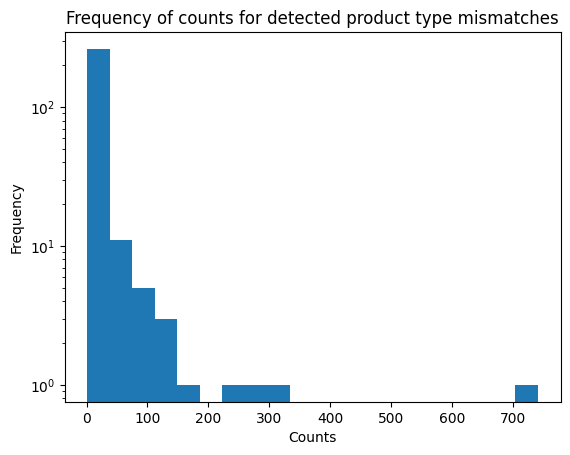

In [187]:
pdf.loc[list(mismatch_category_item_ids), 'product_type'].value_counts().plot.hist(bins=20)
plt.yscale('log')
plt.title('Frequency of counts for detected product type mismatches')
plt.xlabel('Counts')

Set the product_type of the mismatches to null.

In [176]:
for item_id in mismatch_category_item_ids:
    pdf.loc[item_id, 'product_type'] = np.nan

In [178]:
pdf.to_pickle("../../../ShopTalk-blobs/ABO_dataset/abo-listings-final-draft.pkl")
pdf = pd.read_pickle("../../../ShopTalk-blobs/ABO_dataset/abo-listings-final-draft.pkl")
pdf

,brand,bullet_point,color,fabric_type,item_name,item_weight,model_name,product_type,style,main_image_id,other_image_id,country,marketplace,domain_name,material,item_keywords,pattern,model_year,product_description,finish_type
item_id,,,,,,,,,,,,,,,,,,,,
B0857LSVB7,Amazon Brand - Solimo,"[Snug fit for Samsung Galaxy J2 Ace, with perf...",Multicolor,NaN,Amazon Brand - Solimo Designer Lion UV Printed...,50,Samsung Galaxy J2 Ace,CELLULAR PHONE CASE,NaN,81-DuD5XzmL,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Lion Mobi...",NaN,NaN,NaN,NaN
B07C5FF8QS,AmazonBasics,"For best performance, follow the manufacturer'...",NaN,NaN,"AmazonBasics High Mileage Motor Oil, Synthetic...",NaN,NaN,AUTO OIL,High Mileage - Synthetic Blend,81YCp3dcurL,"[817GQ6xx-QL, 81Vr9poKgCL]",SG,Amazon,amazon.sg,NaN,"[oil, mobil 1, penzoil, castrol gtx, 5W-20, 5W...",10W-30,NaN,NaN,NaN
B07TG425LX,Amazon Brand - Solimo,[3D Printed Hard Back Case Mobile Cover for Hu...,Others,NaN,Amazon Brand - Solimo Designer Semi Circle Tex...,50,Huawei P9 lite,CELLULAR PHONE CASE,NaN,71ZoXfUr-sL,"[81IiaAkE6UL, 61Xce1Hq7DL, 61ATVyzpLKL, 61oI69...",IN,Amazon,amazon.in,NaN,"[mobile cover, back cover, mobile case, phone ...",NaN,NaN,NaN,NaN
B07LCHFZCW,Amazon Go,NaN,NaN,NaN,"Amazon Kitchen, Cajun Style Potato Salad, 7.2 oz",NaN,NaN,GROCERY,NaN,61bCuBtuZ4L,"[61njweKAz7L, 61UEtH+yC3L]",US,Amazon,amazon.com,NaN,NaN,NaN,NaN,NaN,NaN
B077W2YX72,Wickedly Prime,"[One 44-ounce plastic tub, Contains wheat, pea...",NaN,NaN,"Wickedly Prime Peanut Butter-Filled Pretzels, ...",2.8,NaN,GROCERY,NaN,71QbaO8qZIL,"[51M39MBAwDL, 71F6YzH37XL, 71d7-4rSVlL, 61ucPj...",US,AmazonGo,amazon.com/go,NaN,"[pretzels, peanut butter, peanut butter pretze...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08569DDNF,Amazon Brand - Solimo,"[Snug fit for Samsung Galaxy A2 Core, with per...",Multicolor,NaN,Amazon Brand - Solimo Designer Chinnese Yin an...,50,Samsung Galaxy A2 Core,CELLULAR PHONE CASE,NaN,71aKx9Gm56L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Chinnese ...",NaN,NaN,NaN,NaN
B0854LJBYD,Amazon Brand - Solimo,"[Snug fit for iKall K200, with perfect cut-out...",Multicolor,NaN,Amazon Brand - Solimo Designer Teddy Bear UV P...,50,iKall K200,CELLULAR PHONE CASE,NaN,71gMBWGQZ0L,"[61+woWTqkwL, 61SE4RTPjdL]",IN,Amazon,amazon.in,Silicon,"[Back Cover, Designer Case, Designer Teddy Bea...",NaN,NaN,NaN,NaN
B081HNTNK7,Amazon Brand - Solimo,"[Snug fit for Mobile, with perfect cut-outs fo...",multi-colored,NaN,Amazon Brand - Solimo Designer Alphabet Patter...,50,Vivo V17 Pro,CELLULAR PHONE CASE,NaN,711dUWWY+AL,"[51AbYbblgmL, 51PN64bqb9L, 51kP9HdPKhL]",IN,Amazon,amazon.in,Plastic,"[mobile cover, back cover, mobile case, phone ...",NaN,NaN,NaN,NaN


#### Map image IDs to image files

There is a file that does the mapping for us.

In [ ]:
image_meta_path = '../../../ShopTalk-blobs/ABO_dataset/images/metadata/images.csv'
image_meta_df = pd.read_csv(image_meta_path).set_index('image_id')
image_meta_df

,height,width,path
image_id,,,
010-mllS7JL,106,106,14/14fe8812.jpg
01dkn0Gyx0L,122,122,da/daab0cad.jpg
01sUPg0387L,111,111,d2/d2daaae9.jpg
1168jc-5r1L,186,186,3a/3a4e88e6.jpg
11RUV5Fs65L,30,500,d9/d91ab9cf.jpg
...,...,...,...
B1zv8OpTkBS,2560,2560,6d/6d49d130.jpg
B1zwflWhPIS,2560,2560,b1/b163e0ea.jpg
C1lf45DhhRS,2560,2560,a1/a116d9d1.jpg


Check that all the image IDs map to an image

In [ ]:
# Previously did not check for nulls. Fixed.
missing_images = 0
all_image_paths = set()
for main_image_id in pdf['main_image_id']:
    if not pd.isna(main_image_id):
        if main_image_id in image_meta_df.index:
            all_image_paths.add(image_meta_df.loc[main_image_id]['path'])
        else:
            missing_images += 1
for other_image_id_list in pdf['other_image_id']:
    if isinstance(other_image_id_list, list):
        for other_image_id in other_image_id_list:
            if other_image_id in image_meta_df.index:
                all_image_paths.add(image_meta_df.loc[other_image_id]['path'])
            else:
                missing_images += 1
print(f'missing images = {missing_images}')
print(f'matched images = {len(all_image_paths)}')

missing images = 0
matched images = 326890
